In [9]:
#import squidpy as sq
import scanpy as sc
import scipy as scp
import numpy as np 
import pandas as pd
#import scvi
import seaborn as sns
import pyensembl as ensb
import matplotlib.pyplot as plt
import mygene

In [10]:
import gseapy as gp
import scanpy as sc

# GSEA

In [11]:
sclcCells = sc.read_h5ad('data/sclcSingletwGenes.h5ad')

In [12]:
sclcCells

AnnData object with n_obs × n_vars = 20561 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [14]:
sclcCells_normal = sc.read_h5ad('data/normalCellsOld.h5ad') 

In [15]:
sclcCells_normal.var.index = sclcCells_normal.var.feature_name

In [16]:
sclcCells_normal.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length
feature_name,,,,,,
A1BG,False,A1BG,A1BG,NCBITaxon:9606,gene,3999
A1BG-AS1,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374
A1CF,False,A1CF,A1CF,NCBITaxon:9606,gene,9603
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318
A2M-AS1,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948
...,...,...,...,...,...,...
RAB1B,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950
STC1,False,STC1,STC1,NCBITaxon:9606,gene,4134
STXBP1,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358


In [17]:
concat = sclcCells.concatenate(sclcCells_1)

C:\Users\User\AppData\Local\Temp\ipykernel_28844\1514864266.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  concat = sclcCells.concatenate(sclcCells_1)


In [18]:
concat

AnnData object with n_obs × n_vars = 82078 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [19]:
concat.obs.groupby('cell_type')['disease'].value_counts()

cell_type                             disease                     
B cell                                normal                          1225
                                      squamous cell lung carcinoma     336
CD1c-positive myeloid dendritic cell  normal                          1521
                                      squamous cell lung carcinoma     703
CD4-positive, alpha-beta T cell       normal                          4276
                                                                      ... 
type I pneumocyte                     normal                            21
type II pneumocyte                    normal                          1781
                                      squamous cell lung carcinoma     720
vein endothelial cell                 normal                          2079
                                      squamous cell lung carcinoma      37
Name: disease, Length: 102, dtype: int64

In [20]:
concat.obs['disease'] = pd.Categorical(concat.obs['disease'], categories=["normal", "squamous cell lung carcinoma"], ordered=True)
indices = concat.obs.sort_values(['cell_type', 'disease']).index
concat = concat[indices,:]

In [21]:
bdata = concat[concat.obs.cell_type == "type I pneumocyte"].copy()
bdata

AnnData object with n_obs × n_vars = 293 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 'tis

In [22]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res = gp.gsea(data=bdata.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2021",
        cls=bdata.obs.disease,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


107.12363600730896


In [23]:
res.res2d.head(10)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,inflammatory response (GO:0006954),0.491565,3.063689,0.0,0.0,0.0,51/135,19.01%,S100A9;S100A8;THBS1;CCL2;CXCL3;CXCL8;CCL17;LYZ...
1,gsea,neutrophil chemotaxis (GO:0030593),0.701074,2.958924,0.0,0.0,0.0,18/43,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
2,gsea,granulocyte chemotaxis (GO:0071621),0.693708,2.954929,0.0,0.0,0.0,18/44,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
3,gsea,neutrophil migration (GO:1990266),0.6788,2.91827,0.0,0.0,0.0,18/45,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
4,gsea,antimicrobial humoral immune response mediated...,0.684802,2.881346,0.0,0.0,0.0,15/30,14.33%,S100A9;CXCL3;CXCL8;GAPDH;S100A12;RPS19;CXCL2;D...
5,gsea,monocyte chemotaxis (GO:0002548),0.697362,2.749667,0.0,0.0,0.0,8/20,5.62%,CCL2;CCL17;CCL3;S100A12;RPS19;CCL21;CCL4;CCL20
6,gsea,cellular response to chemokine (GO:1990869),0.601294,2.671448,0.0,0.000348,0.001,15/33,15.42%,CCL2;CXCL3;CXCL8;CCL17;CCL3;LRCH1;CCL21;CXCL2;...
7,gsea,positive regulation of T cell activation (GO:0...,0.543825,2.669425,0.0,0.000304,0.001,19/43,14.87%,CCL2;THY1;AIF1;LGALS9;IL1B;XBP1;NCKAP1L;ZP3;SI...
8,gsea,chemokine-mediated signaling pathway (GO:0070098),0.61874,2.623396,0.0,0.000271,0.001,14/28,15.42%,CCL2;CXCL3;CXCL8;CCL17;CCL3;CCL21;CXCL2;CCL4;C...
9,gsea,positive regulation of lymphocyte activation (...,0.65236,2.58064,0.0,0.000244,0.001,7/22,5.94%,CCL2;ZNF335;THY1;TYROBP;NCKAP1L;SIRPG;IGLL1


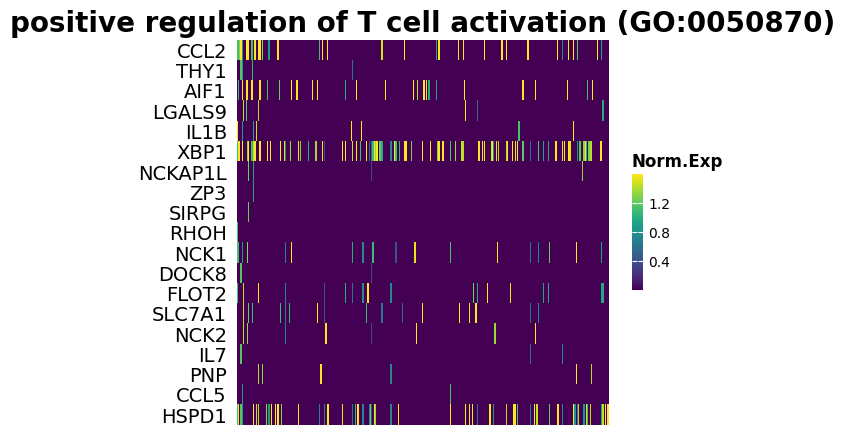

In [24]:
## Heatmap of gene expression
i = 7
genes = res.res2d.Lead_genes.iloc[i].split(";")
ax = gp.heatmap(df = res.heatmat.loc[genes],
           z_score=None,
           title=res.res2d.Term.iloc[i],
           figsize=(6,5),
           cmap=plt.cm.viridis,
           xticklabels=False)

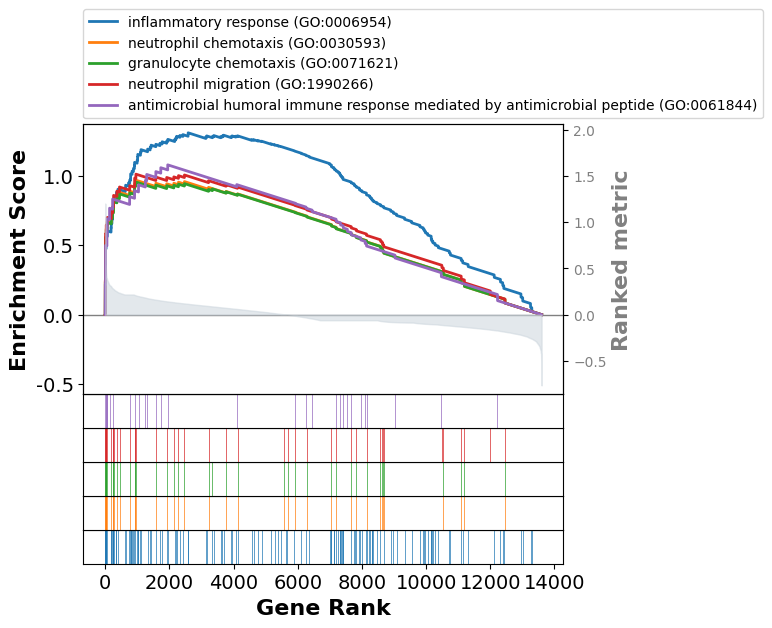

In [25]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms=term[:5])

In [26]:
# find degs
sc.tl.rank_genes_groups(bdata,
                        groupby='disease',
                        use_raw=False,
                        #layer='lognorm',
                        method='wilcoxon',
                        groups=["squamous cell lung carcinoma"],
                        reference='normal')

In [27]:
bdata.X.max() # already log1p

8.258444

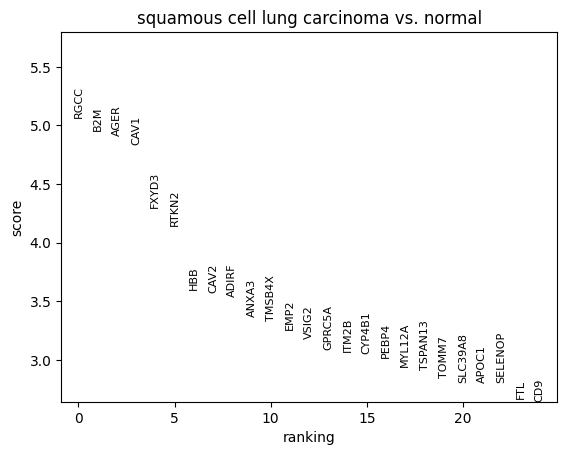

In [28]:
sc.pl.rank_genes_groups(bdata, n_genes=25, sharey=False)

In [29]:
# get deg result
result = bdata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group.split(' ')[0] + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [30]:
degs

,squamous_names,squamous_scores,squamous_pvals,squamous_pvals_adj,squamous_logfoldchanges
0,RGCC,5.068287,4.014120e-07,0.007532,3.873117
1,B2M,4.950668,7.395902e-07,0.008637,1.138853
2,AGER,4.907898,9.205767e-07,0.008637,1.755922
3,CAV1,4.838396,1.308910e-06,0.010526,1.844934
4,FXYD3,4.295747,1.741058e-05,0.089103,1.854532
...,...,...,...,...,...
56290,S100A8,-4.627218,3.706110e-06,0.023182,-4.500215
56291,PFN1,-4.683354,2.822189e-06,0.019859,-2.145910
56292,S100A9,-4.923937,8.482017e-07,0.008637,-4.582415
56293,SCGB1A1,-5.242042,1.588097e-07,0.004470,-6.452377


In [31]:
# subset up or down regulated genes
degs_sig = degs[degs.squamous_pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.squamous_logfoldchanges > 0]
degs_dw = degs_sig[degs_sig.squamous_logfoldchanges < 0]

In [32]:
enr_up = gp.enrichr(degs_up.squamous_names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

In [33]:
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

In [36]:
enr_dw = gp.enrichr(degs_dw.squamous_names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

In [38]:
# concat results
enr_up.res2d['UP_DW'] = "UP"
enr_dw.res2d['UP_DW'] = "DOWN"
enr_res = pd.concat([enr_up.res2d.head(), enr_dw.res2d.head()])

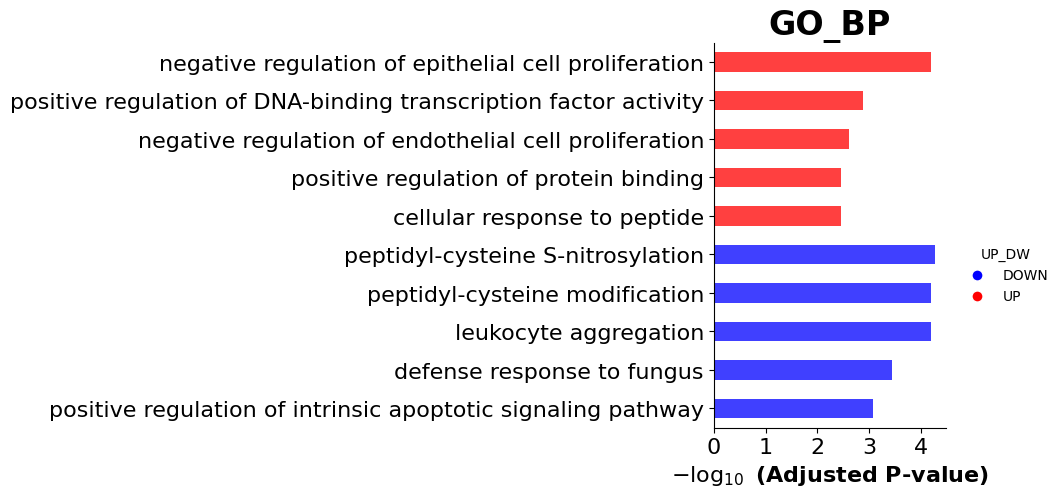

In [39]:
ax = gp.barplot(enr_res, figsize=(3,5),
                group ='UP_DW',
                title ="GO_BP",
                color = ['b','r'])

In [40]:
import networkx as nx

In [41]:
res.res2d.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,inflammatory response (GO:0006954),0.491565,3.063689,0.0,0.0,0.0,51/135,19.01%,S100A9;S100A8;THBS1;CCL2;CXCL3;CXCL8;CCL17;LYZ...
1,gsea,neutrophil chemotaxis (GO:0030593),0.701074,2.958924,0.0,0.0,0.0,18/43,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
2,gsea,granulocyte chemotaxis (GO:0071621),0.693708,2.954929,0.0,0.0,0.0,18/44,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
3,gsea,neutrophil migration (GO:1990266),0.6788,2.91827,0.0,0.0,0.0,18/45,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
4,gsea,antimicrobial humoral immune response mediated...,0.684802,2.881346,0.0,0.0,0.0,15/30,14.33%,S100A9;CXCL3;CXCL8;GAPDH;S100A12;RPS19;CXCL2;D...


In [42]:
nodes, edges = gp.enrichment_map(res.res2d)

In [43]:
nodes.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,gsea,cellular response to chemokine (GO:1990869),0.601294,2.671448,0.0,0.000348,0.001,15/33,15.42%,CCL2;CXCL3;CXCL8;CCL17;CCL3;LRCH1;CCL21;CXCL2;...,3.458551,0.454545
1,gsea,positive regulation of T cell activation (GO:0...,0.543825,2.669425,0.0,0.000304,0.001,19/43,14.87%,CCL2;THY1;AIF1;LGALS9;IL1B;XBP1;NCKAP1L;ZP3;SI...,3.516543,0.441860
2,gsea,chemokine-mediated signaling pathway (GO:0070098),0.61874,2.623396,0.0,0.000271,0.001,14/28,15.42%,CCL2;CXCL3;CXCL8;CCL17;CCL3;CCL21;CXCL2;CCL4;C...,3.567696,0.500000
3,gsea,positive regulation of lymphocyte activation (...,0.65236,2.58064,0.0,0.000244,0.001,7/22,5.94%,CCL2;ZNF335;THY1;TYROBP;NCKAP1L;SIRPG;IGLL1,3.613453,0.318182
4,gsea,monocyte chemotaxis (GO:0002548),0.697362,2.749667,0.0,0.000244,0.0,8/20,5.62%,CCL2;CCL17;CCL3;S100A12;RPS19;CCL21;CCL4;CCL20,3.613453,0.400000


In [44]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

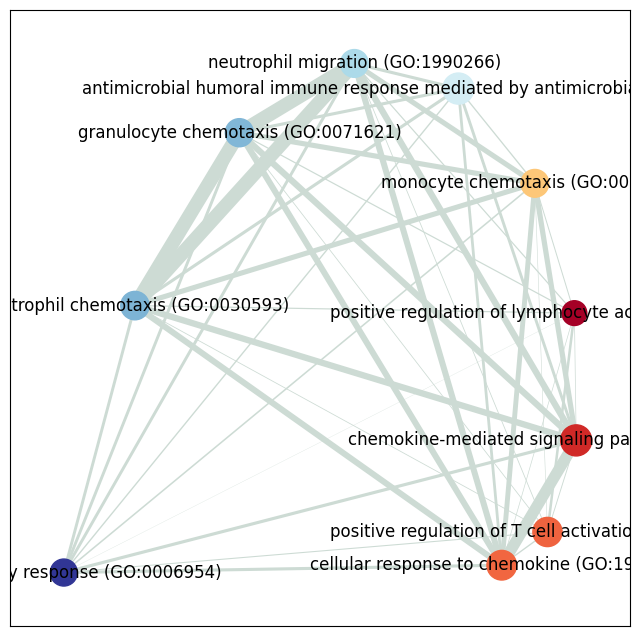

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()